In [1]:
"""What is is:
Messing around with an ugly group of files to make the shapefile I want.
I want a shapefile with only data for geoids/census tracts within
Boston, Cambridge, Somerville, Brookline.

Approach: 
- Start with shapefile for all of MA
- Get list of census tracts and/or geoids for cities of interest.
- Prune shapefile to only include data for those places.

"""
import pandas as pd
import geopandas as gpd

ma_shapefile shape (1472, 22)


,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,AREA_ACRES,POP100_RE,HU100_RE,LOGPL94171,LOGSF1,LOGACS0610,LOGSF1C,SHAPE_AREA,SHAPE_LEN,geometry
0,25,021,418003,25021418003,4180.03,Census Tract 4180.03,G5020,1705668.0,2936.0,+42.2350240,...,422.1740,2481,1350,0141872,123764,0003690,0123764,1.708484e+06,6274.185034,"POLYGON ((240678.7591999993 886748.0731000006,..."
1,25,021,417701,25021417701,4177.01,Census Tract 4177.01,G5020,1543651.0,12275.0,+42.2523398,...,384.4502,5417,2983,0141838,123730,0003683,0123730,1.555821e+06,6229.137913,"POLYGON ((240969.6662999988 890122.8055999987,..."
2,25,021,417702,25021417702,4177.02,Census Tract 4177.02,G5020,1685529.0,317947.0,+42.2582818,...,416.4918,2765,1109,0141843,123735,0003684,0123735,1.685489e+06,8542.498286,"POLYGON ((242328.2212999985 890545.0498999991,..."


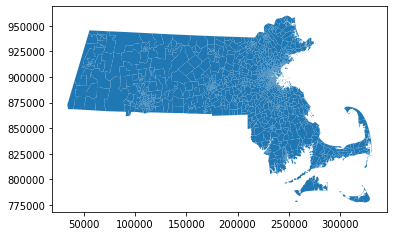

In [2]:
# MA shapefile

ma_shapefile_filename = '../data/ma/dumps/ma_census_tracts_2010/CENSUS2010TRACTS_POLY.shp'
ma_shapefile_df = gpd.read_file(ma_shapefile_filename)
%matplotlib inline
ma_shapefile_df.plot()

print('ma_shapefile shape', ma_shapefile_df.shape)
ma_shapefile_df.head(3)

ma_shapefile shape (181, 19)
boston geoids (181,)


,FID,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,Shape_STAr,Shape_STLe,Shape__Are,Shape__Len,geometry
0,1,1,25,025,010405,25025010405,104.05,Census Tract 104.05,G5020,S,363702,0,+42.3398654,-071.0896052,3.914568e+06,14629.550361,666099.906250,6036.192858,"POLYGON ((-71.0900876001992 42.3466656698382, ..."
1,2,2,25,025,010404,25025010404,104.04,Census Tract 104.04,G5020,S,136829,0,+42.3419667,-071.0886375,1.472714e+06,5277.643216,250612.402344,2176.592125,"POLYGON ((-71.0906605999872 42.3397746685099, ..."
2,3,3,25,025,010801,25025010801,108.01,Census Tract 108.01,G5020,S,127905,0,+42.3541193,-071.0770216,1.376667e+06,6166.497167,234357.902344,2542.042976,"POLYGON ((-71.0815955978202 42.3537126714488, ..."


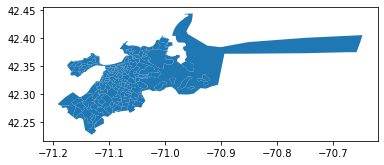

In [3]:
# Boston census tracts
# this gets the geoids
boston_shapefile_filename = '../data/ma/dumps/boston_census_tracts_2010/Census_2010_Tracts.shp'
boston_shapefile_df = gpd.read_file(boston_shapefile_filename)
%matplotlib inline
boston_shapefile_df.plot()

print('ma_shapefile shape', boston_shapefile_df.shape)

boston_geoids = boston_shapefile_df['GEOID10'].unique()
print('boston geoids',  boston_geoids.shape)
assert(boston_geoids.shape[0] == boston_shapefile_df.shape[0])
boston_geoids = list(boston_geoids)
boston_shapefile_df.head(3)

In [4]:
# Brookline census tracts
# I got these from here: https://www.brooklinema.gov/DocumentCenter/View/1402/Census-Tract-11x17-PDF
BROOKLINE_MA_CENSUS_TRACTS = [400100,400200,400300,400400,400500,400600,400700,400800,400900,401000,401100,401200]
# make them geoids
# Brookline is in Norfolk County. FIPS code 021
# sooo can I make a geoid as 25+021+tract and expect it to be in the MA shapefile?  I'll check
ma_geoids = ma_shapefile_df['GEOID10'].unique()
brookline_geoids = ['25021' + str(tract) for tract in BROOKLINE_MA_CENSUS_TRACTS]
for geoid in brookline_geoids:
    assert(geoid in ma_geoids)
# Cool that worked.

cambridge_shapefile shape (32, 15)
cambridge geoids (32,)


,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,SHAPE_area,SHAPE_len,geometry
0,25,017,354900,25017354900,3549,Census Tract 3549,G5020,S,1248426.0,45236.0,+42.3957391,-071.1417104,1.399326e+07,19097.149434,"POLYGON ((752502.3584374934 2970000.000312507,..."
1,25,017,354800,25017354800,3548,Census Tract 3548,G5020,S,310502.0,0.0,+42.3926659,-071.1279417,3.343814e+06,8455.513483,"POLYGON ((757625.4200000018 2967277.129999995,..."
2,25,017,354700,25017354700,3547,Census Tract 3547,G5020,S,355847.0,0.0,+42.3895797,-071.1226221,3.802148e+06,10438.563178,"POLYGON ((758738.8225000054 2968365.540312499,..."


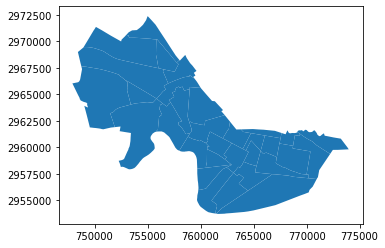

In [5]:
# Cambridge geoids

cambridge_shapefile_filename = '../data/ma/dumps/cambridge_ma_census_tracts_2010.shp/DEMOGRAPHICS_Tracts2010.shp'
cambridge_shapefile_df = gpd.read_file(cambridge_shapefile_filename)
%matplotlib inline
cambridge_shapefile_df.plot()

print('cambridge_shapefile shape', cambridge_shapefile_df.shape)
cambridge_geoids = cambridge_shapefile_df['GEOID10'].unique()
print('cambridge geoids',  cambridge_geoids.shape)
assert(cambridge_geoids.shape[0] == cambridge_shapefile_df.shape[0])
cambridge_geoids = list(cambridge_geoids)
cambridge_shapefile_df.head(3)

In [6]:
# Somerville geoids
somerville_filename = '../data/ma/dumps/somerville_data.csv'
somerville_df = pd.read_csv(somerville_filename)

somerville_tracts = [i[-6:len(i)] for i in somerville_df['GEO.id2'].unique() if i != 'Id2']

# Transform tracts into geoids
# Somerville is in Middlesex county.  county FP is 017
somerville_geoids = ['25017' + str(tract) for tract in somerville_tracts]
for geoid in somerville_geoids:
    assert(geoid in ma_shapefile_df['GEOID10'].unique())
somerville_df.head()

,GEO.id,GEO.id2,GEO.display-label,D001
0,Id,Id2,Geography,Total
1,1580000US2562535017350103,2562535017350103,"Census Tract 3501.03, Middlesex County (part),...",520
2,1580000US2562535017350104,2562535017350104,"Census Tract 3501.04, Middlesex County (part),...",2898
3,1580000US2562535017350200,2562535017350200,"Census Tract 3502, Middlesex County (part), So...",2763
4,1580000US2562535017350300,2562535017350300,"Census Tract 3503, Middlesex County (part), So...",1148


In [7]:
# Everett census tracts
EVERETT_MA_CENSUS_TRACTS = [342101,342102,342201,342202,342300,342400,342500,342600]
# make them geoids
# Everett is in Middlesex County. FIPS code 017
ma_geoids = ma_shapefile_df['GEOID10'].unique()
everett_geoids = ['25017' + str(tract) for tract in EVERETT_MA_CENSUS_TRACTS]
for geoid in everett_geoids:
    assert(geoid in ma_geoids)

pruned shape (251, 22)


,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,AREA_ACRES,POP100_RE,HU100_RE,LOGPL94171,LOGSF1,LOGACS0610,LOGSF1C,SHAPE_AREA,SHAPE_LEN,geometry
227,25,021,401200,25021401200,4012,Census Tract 4012,G5020,6692464.0,32335.0,+42.3146076,...,1661.6151,7031,2645,0141546,123438,0003622,0123438,6.724345e+06,11423.687064,"POLYGON ((230135.4324000031 895483.0293000005,..."
228,25,021,401100,25021401100,4011,Census Tract 4011,G5020,4116857.0,109099.0,+42.3238531,...,1044.1827,4441,1629,0141542,123434,0003621,0123434,4.225675e+06,11885.022027,"POLYGON ((230635.0429999977 897756.7096000016,..."
229,25,021,401000,25021401000,4010,Census Tract 4010,G5020,640097.0,580.0,+42.3274299,...,158.3029,3149,1342,0141538,123430,0003620,0123430,6.406316e+05,3428.999786,"POLYGON ((231725.3022999987 897626.6975999996,..."
230,25,021,400900,25021400900,4009,Census Tract 4009,G5020,383245.0,2025.0,+42.3332089,...,95.1955,3865,2017,0141534,123426,0003619,0123426,3.852440e+05,2872.982317,"POLYGON ((232018.1828000024 898306.1519000009,..."
231,25,021,400800,25021400800,4008,Census Tract 4008,G5020,567433.0,5033.0,+42.3387738,...,141.4504,5630,2636,0141530,123422,0003618,0123422,5.724317e+05,3649.975331,"POLYGON ((231517.0737000033 899012.4495999999,..."


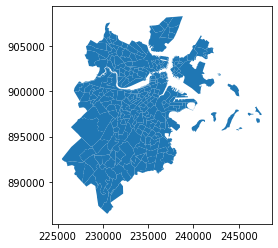

In [8]:
# Now I have all of the geoids
interesting_geoids = boston_geoids + brookline_geoids + cambridge_geoids + somerville_geoids + everett_geoids

pruned_ma_shapefile_df = ma_shapefile_df[ma_shapefile_df['GEOID10'].isin(interesting_geoids)]
print('pruned shape', pruned_ma_shapefile_df.shape)
%matplotlib inline
pruned_ma_shapefile_df.plot()

pruned_ma_shapefile_df.head()

In [9]:
# Save the file!
output_filename = '../data/ma/shapefile/boston-brookline-cambridge-somerville-everett.shp'
print('saving output to ', output_filename)
pruned_ma_shapefile_df.to_file(output_filename)
print('saved')

saving output to  ../data/ma/shapefile/boston-brookline-cambridge-somerville-everett.shp
saved
